<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#First-Pass" data-toc-modified-id="First-Pass-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>First Pass</a></span></li><li><span><a href="#Second-Pass" data-toc-modified-id="Second-Pass-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Second Pass</a></span></li></ul></div>

**Background:**

There are exactly 100 sneaker shops on a sneaker retailing website, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis.


**Questions:**

What went wrong with this metric and our analysis?

Propose some new metrics that better represents the behavior of the stores' customers. Why are these metrics better? You can propose as many new metrics as you wish but quality heavily outweights quantity.

Find the values of your new metrics.

Report any other interesting findings.

Show all of your work in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
orders = pd.read_csv('orders.csv')
orders.head()

,order_id,shop_id,user_id,order_value,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


# First Pass

In [3]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_value     5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


In [4]:
orders.order_value.mean()

3145.128

The reason this AOV is off is because each order value corresponds to a different number of items (for example order_id 1 contains 2 pairs of shoes)

To account for this, we should be dividing the sum of the order_values by the sum of total_items

In [5]:
total_value = orders.order_value.sum()
total_value

15725640

In [6]:
total_value / 5000

3145.128

In [7]:
total_items = orders.total_items.sum()
total_items

43936

So we should be dividing by 43,936 rather than the number of rows (5,000) to get average price of bought items

In [9]:
AOV = total_value / total_items
AOV

357.92152221412965

In [11]:
orders.head(20)

,order_id,shop_id,user_id,order_value,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
5,6,58,882,138,1,credit_card,2017-03-14 15:25:01
6,7,87,915,149,1,cash,2017-03-01 21:37:57
7,8,22,761,292,2,cash,2017-03-08 2:05:38
8,9,64,914,266,2,debit,2017-03-17 20:56:50
9,10,52,788,146,1,credit_card,2017-03-30 21:08:26


In [12]:
large_orders = orders[orders.total_items >= 100]
large_orders.shape

(17, 7)

In [13]:
large_orders

,order_id,shop_id,user_id,order_value,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00


Seems like this one user (607) is consistently making massive orders (w 2000 items in each)

In [14]:
orders.user_id.nunique()

301

In [18]:
value_by_user = orders.groupby('user_id').order_value.mean().reset_index()
value_by_user.head()

,user_id,order_value
0,607,704000.000000
1,700,299.375000
2,701,397.076923
3,702,406.615385
4,703,380.687500


In [24]:
value_by_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   user_id      301 non-null    int64  
 1   order_value  301 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.8 KB


In [23]:
value_by_user.sort_values('order_value', ascending = False)

,user_id,order_value
0,607,704000.000000
179,878,14266.909091
67,766,8007.600000
135,834,6019.000000
216,915,5785.142857
...,...,...
193,892,227.307692
200,899,226.666667
128,827,226.500000
240,939,219.600000


In [26]:
orders_by_user = orders.groupby('user_id').order_id.count().reset_index()
orders_by_user.head()

,user_id,order_id
0,607,17
1,700,16
2,701,13
3,702,13
4,703,16


In [28]:
total_items_per_user = orders.groupby('user_id').total_items.sum().reset_index()
total_items_per_user.head()

,user_id,total_items
0,607,34000
1,700,30
2,701,34
3,702,34
4,703,41


In [30]:
user_df = orders_by_user.merge(total_items_per_user, on = 'user_id').merge(value_by_user, on = 'user_id')
user_df.head()


,user_id,order_id,total_items,order_value
0,607,17,34000,704000.000000
1,700,16,30,299.375000
2,701,13,34,397.076923
3,702,13,34,406.615385
4,703,16,41,380.687500


In [31]:
user_df.rename(columns = {'order_id': 'orders', 'order_value': 'value_per_order'}, inplace = True)
user_df.head()

,user_id,orders,total_items,value_per_order
0,607,17,34000,704000.000000
1,700,16,30,299.375000
2,701,13,34,397.076923
3,702,13,34,406.615385
4,703,16,41,380.687500


In [32]:
user_df['total_value'] = user_df.orders * user_df.value_per_order
user_df.head()

,user_id,orders,total_items,value_per_order,total_value
0,607,17,34000,704000.000000,11968000.0
1,700,16,30,299.375000,4790.0
2,701,13,34,397.076923,5162.0
3,702,13,34,406.615385,5286.0
4,703,16,41,380.687500,6091.0


Text(0.5, 0, 'quantity of orders')

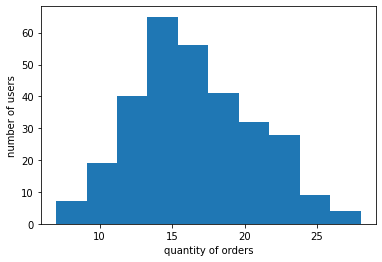

In [35]:
plt.hist(user_df.orders)
plt.ylabel("number of users")
plt.xlabel('quantity of orders')

Most users are placing 12-20 orders

(array([300.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([1.40000e+01, 3.41260e+03, 6.81120e+03, 1.02098e+04, 1.36084e+04,
        1.70070e+04, 2.04056e+04, 2.38042e+04, 2.72028e+04, 3.06014e+04,
        3.40000e+04]),
 <BarContainer object of 10 artists>)

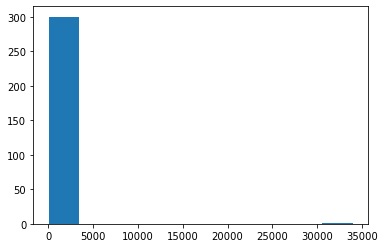

In [36]:
plt.hist(user_df.total_items)

(array([ 9., 20., 55., 60., 48., 45., 27., 21., 11.,  4.]),
 array([14. , 18.4, 22.8, 27.2, 31.6, 36. , 40.4, 44.8, 49.2, 53.6, 58. ]),
 <BarContainer object of 10 artists>)

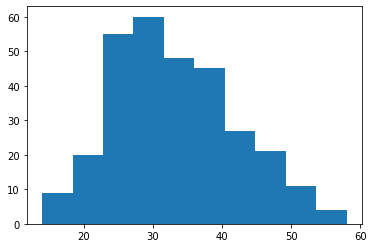

In [38]:
plt.hist(user_df[user_df.total_items < 5000].total_items)

In [39]:
704000 / 2000

352.0

(array([1.830e+03, 1.832e+03, 9.410e+02, 0.000e+00, 2.930e+02, 7.700e+01,
        0.000e+00, 9.000e+00, 0.000e+00, 1.000e+00]),
 array([1. , 1.7, 2.4, 3.1, 3.8, 4.5, 5.2, 5.9, 6.6, 7.3, 8. ]),
 <BarContainer object of 10 artists>)

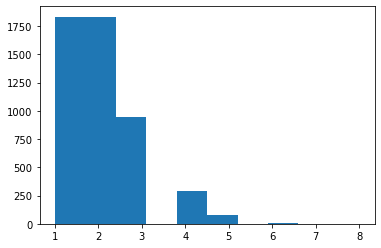

In [41]:
plt.hist(orders[orders.total_items < 1500].total_items)

this represents our typical, non-outlier customers. the outlier may be a distributor

In [43]:
sum_normal_values = orders[orders.total_items < 1500].order_value.sum()
sum_normal_items = orders[orders.total_items < 1500].total_items.sum()
value_per_item = sum_normal_values / sum_normal_items

In [44]:
valuer_per_item

378.1843800322061

In [45]:
orders[orders.total_items < 1500].order_value.mean()

754.0919125025085

# Second Pass

In [3]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_value     5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


In [5]:
orders.shop_id.nunique()

100

5,000 observations, no missing data, data from 100 shops as promised

In [4]:
orders.describe()

,order_id,shop_id,user_id,order_value,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


Looks like the AOV was calculated as the mean order_value. Oddly, the max order value looks to be 704,000 which and the max total items within an order is 2000

<AxesSubplot:xlabel='order_value', ylabel='Count'>

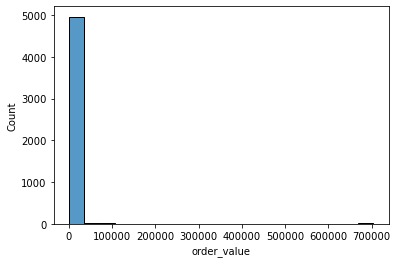

In [8]:
sns.histplot(orders, x = 'order_value', bins = 20)

<AxesSubplot:xlabel='order_value', ylabel='Count'>

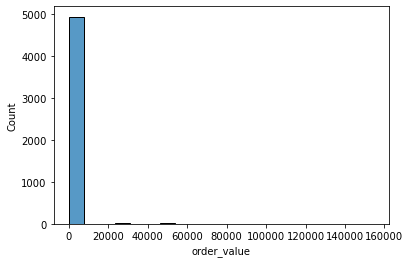

In [9]:
sns.histplot(orders[orders.order_value < 200000], x = 'order_value', bins = 20)

<AxesSubplot:xlabel='order_value', ylabel='Count'>

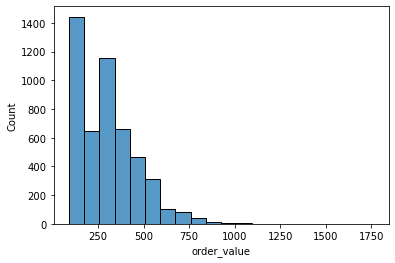

In [11]:
sns.histplot(orders[orders.order_value < 10000], x = 'order_value', bins = 20)

The vast majority of orders are well well under 2,000

In [12]:
high_orders = orders[orders.order_value >= 10000]
high_orders.head()

,order_id,shop_id,user_id,order_value,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
160,161,78,990,25725,1,credit_card,2017-03-12 5:56:57
490,491,78,936,51450,2,debit,2017-03-26 17:08:19
493,494,78,983,51450,2,cash,2017-03-16 21:39:35


In [13]:
high_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63 entries, 15 to 4918
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        63 non-null     int64 
 1   shop_id         63 non-null     int64 
 2   user_id         63 non-null     int64 
 3   order_value     63 non-null     int64 
 4   total_items     63 non-null     int64 
 5   payment_method  63 non-null     object
 6   created_at      63 non-null     object
dtypes: int64(5), object(2)
memory usage: 3.9+ KB


In [14]:
high_orders.shop_id.nunique()

2

In [17]:
high_orders.shop_id.unique()

array([42, 78])

In [15]:
high_orders.user_id.nunique()

46

In [16]:
orders.user_id.nunique()

301

In [19]:
high_orders.dtypes

order_id           int64
shop_id            int64
user_id            int64
order_value        int64
total_items        int64
payment_method    object
created_at        object
dtype: object

<AxesSubplot:xlabel='total_items', ylabel='order_value'>

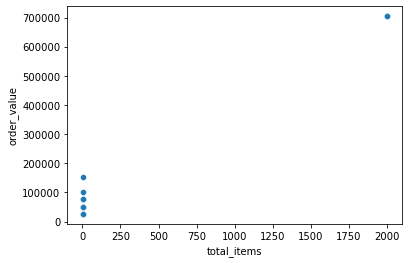

In [21]:
sns.scatterplot(data = high_orders, x = 'total_items', y = 'order_value')

In [22]:
high_orders.total_items.unique()

array([2000,    1,    2,    6,    3,    4])

In [23]:
high_orders.groupby('total_items').order_value.mean().reset_index()

,total_items,order_value
0,1,25725.0
1,2,51450.0
2,3,77175.0
3,4,102900.0
4,6,154350.0
5,2000,704000.0


In [29]:
high_orders.groupby('total_items').order_id.count()

total_items
1       19
2       16
3        9
4        1
6        1
2000    17
Name: order_id, dtype: int64

In [27]:
[25725*1, 25725*2, 25725*3, 25725*4, 25725*5, 25725*6, 25725*2000]

[25725, 51450, 77175, 102900, 128625, 154350, 51450000]

In [30]:
704000 / 2000

352.0

Looks like the first 5 rows are all buying pairs of a shoes that cost 25725 each and the massive order is buying some combination of shoe with an average value of 352

In [28]:
high_orders.groupby(['total_items', 'shop_id']).order_value.mean().reset_index()

,total_items,shop_id,order_value
0,1,78,25725.0
1,2,78,51450.0
2,3,78,77175.0
3,4,78,102900.0
4,6,78,154350.0
5,2000,42,704000.0


In [33]:
np.percentile(orders.order_value, [75, 80, 85, 90, 95, 97, 98, 99])

array([  390.  ,   444.  ,   483.  ,   531.  ,   640.  ,   712.  ,
         800.08, 25725.  ])

In [56]:
pd.DataFrame(data = {'percentile': [75, 80, 85, 90, 95, 97, 98, 99], 'perc_order_value': np.percentile(orders.order_value, [75, 80, 85, 90, 95, 97, 98, 99])})
                                                                                                      

,percentile,perc_order_value
0,75,390.00
1,80,444.00
2,85,483.00
3,90,531.00
4,95,640.00
5,97,712.00
6,98,800.08
7,99,25725.00


over 98% of orders orders are under 1000

Easiest way to approach this problem is to simply use the median for AOV because of the extreme right skew of the data

In [34]:
orders.order_value.median()

284.0

In [35]:
typical_orders = orders[orders.order_value <= np.percentile(orders.order_value, 98)]
typical_orders.shape
                                                            
                                                            

(4900, 7)

<AxesSubplot:xlabel='order_value', ylabel='Count'>

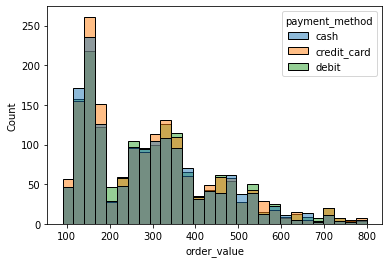

In [40]:
sns.histplot(typical_orders, x = 'order_value', hue = 'payment_method', alpha = .5)
#no real diff in payment method

Can also cut out the highest 2% of data and take the mean

In [37]:
typical_orders.order_value.mean()

297.66714285714284

<AxesSubplot:xlabel='total_items', ylabel='Count'>

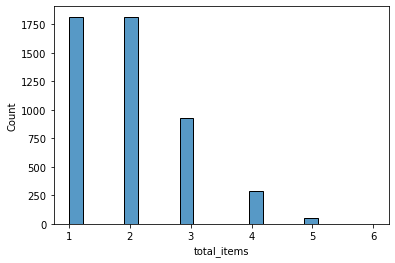

In [43]:
sns.histplot(typical_orders, x = 'total_items')

<AxesSubplot:xlabel='total_items', ylabel='order_value'>

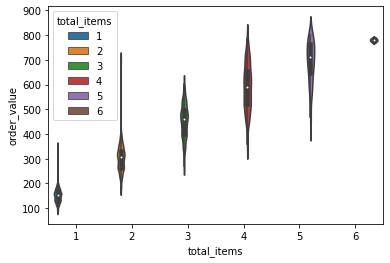

In [69]:
sns.violinplot(data = typical_orders, x = 'total_items', y = 'order_value', hue = 'total_items')

<AxesSubplot:xlabel='total_items', ylabel='order_value'>

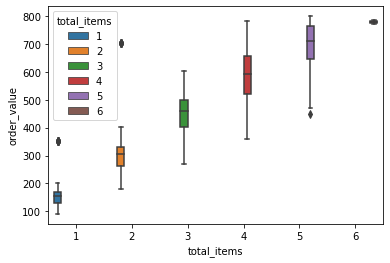

In [50]:
sns.boxplot(data = typical_orders, x = 'total_items', y = 'order_value', hue = 'total_items')

In [45]:
typical_orders.groupby('total_items').order_value.mean().reset_index()

,total_items,order_value
0,1,151.850911
1,2,303.520925
2,3,455.392896
3,4,591.486111
4,5,691.037736
5,6,780.000000


In [73]:
orders_by_shop = orders.groupby('shop_id')
orders_by_shop

In [80]:
pd.merge(orders_by_shop.order_id.count(), orders_by_shop.order_value.mean(), on = 'shop_id')

shop_id
1      44
2      55
3      48
4      51
5      45
       ..
96     51
97     48
98     58
99     54
100    40
Name: order_id, Length: 100, dtype: int64

In [81]:
shops = pd.merge(orders_by_shop.order_id.count(), orders_by_shop.order_value.mean(), on = 'shop_id')


,order_id,order_value
shop_id,,
1,44,308.818182
2,55,174.327273
3,48,305.250000
4,51,258.509804
5,45,290.311111
...,...,...
96,51,330.000000
97,48,324.000000
98,58,245.362069


In [82]:
shops = pd.merge(shops, orders_by_shop.total_items.sum(), on = 'shop_id')


In [86]:
shops.sort_values('order_value', ascending = False)

,order_id,order_value,total_items
shop_id,,,
42,51,235101.490196,34063
78,46,49213.043478,88
50,44,403.545455,92
90,49,403.224490,111
38,35,390.857143,72
...,...,...,...
53,68,214.117647,130
100,40,213.675000,77
32,42,189.976190,79


[(0.0, 500.0)]

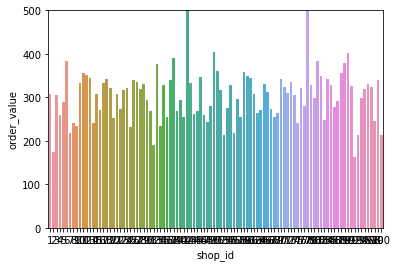

In [91]:
ax = sns.barplot(data = shops, x = shops.index, y = 'order_value')
ax.set(ylim=(0, 500))

[(0.0, 2000.0)]

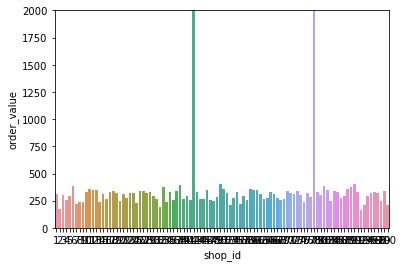

In [92]:
ax = sns.barplot(data = shops, x = shops.index, y = 'order_value')
ax.set(ylim=(0, 2000))

In [84]:
shops.head()

,order_id,order_value,total_items
shop_id,,,
1,44,308.818182,86
2,55,174.327273,102
3,48,305.250000,99
4,51,258.509804,103
5,45,290.311111,92


In [58]:
orders.head()

,order_id,shop_id,user_id,order_value,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [64]:
typical_orders['created_at'] = pd.to_datetime(typical_orders.created_at)
typical_orders.dtypes

/var/folders/kc/cp_p0ggj2j30ytw2b713s_2m0000gn/T/ipykernel_12208/1087905778.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  typical_orders['created_at'] = pd.to_datetime(typical_orders.created_at)


order_id                   int64
shop_id                    int64
user_id                    int64
order_value                int64
total_items                int64
payment_method            object
created_at        datetime64[ns]
dtype: object

In [67]:
typical_orders['day'] = typical_orders.created_at.dt.day
typical_orders['month'] = typical_orders.created_at.dt.month
typical_orders.head()

/var/folders/kc/cp_p0ggj2j30ytw2b713s_2m0000gn/T/ipykernel_12208/525901681.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  typical_orders['day'] = typical_orders.created_at.dt.day
/var/folders/kc/cp_p0ggj2j30ytw2b713s_2m0000gn/T/ipykernel_12208/525901681.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  typical_orders['month'] = typical_orders.created_at.dt.month


,order_id,shop_id,user_id,order_value,total_items,payment_method,created_at,day,month
0,1,53,746,224,2,cash,2017-03-13 12:36:56,13,3
1,2,92,925,90,1,cash,2017-03-03 17:38:52,3,3
2,3,44,861,144,1,cash,2017-03-14 04:23:56,14,3
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37,26,3
4,5,18,883,156,1,credit_card,2017-03-01 04:35:11,1,3


In [ ]:
sns.lineplot(data = typical_orders, x = )

**Organize above and figure out how to work with a grouped dataframe more effectively**